# Steepest descent aplicado à função Rosenbrock

Este algoritmo aplica o método de otimização Steepest descent à função matemática de Rosenbrock, a qual é definida pela equação geral:

\begin{equation}
f(x,y) = (a - x)^2 + b(y - x^2)^2 ,
\end{equation}

onde $a$ e $b$ são constantes e o mínimo dessa função é $(x,y)=(a,a^2)$, onde $f(a,a^2)=0$. Normalmente $a$ e $b$ são iguais a 1 e a 100, respectivamente, nesse caso, o mínimo dessa função é $(x,y)=(1,1)$.

Então a função a ser minimizada através do método steepest descente é:

\begin{equation}
f(p_1,p_2) = 100(p_2 - p_1^2)^2 + (p_1 - 1)^2 ,
\end{equation}

A proposta do código é encontrar o mínimo da função através de muitas iterações.

O método steepest descent é um método de convergência global, o qual se aproxima do mínimo com a direção de $-\nabla \boldsymbol{\phi}(\mathbf{p})$, que é menos o gradiente da função objetivo e $\mathbf{p}$ é o vetor de parâmentros. O método possui o seguinte algoritmo:

1) estabelece um chute inicial $\mathbf{p}_i$

2) determina a direção $\mathbf{a}_i$ que diminua $\boldsymbol{\phi}$ em torno de $\mathbf{p}_i$

3) calcula $\mathbf{p}_{i+1} = \mathbf{p}_i + \rho _i \mathbf{a}_i$, onde $\rho_i$ é um escalar que modula o passo em direção ao mínimo e $\mathbf{a}_i = -\nabla \boldsymbol{\phi}(\mathbf{p})$
 
4) testa a convergência, se for satisfeita o algoritmo para, caso contrário retorna para 1)

# Importando pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker

## Plotando a função

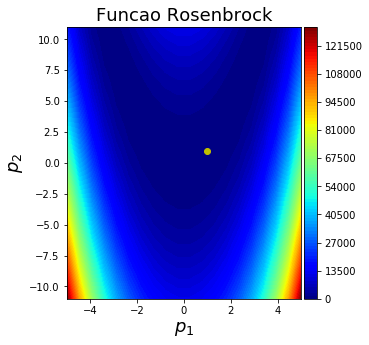

In [2]:
#definindo os parâmetros
p1 = np.linspace(-5., 5., 20)
p2 = np.linspace(-11., 11., 20)

#criando um grid
p1, p2 = np.meshgrid(p1, p2)

# calculando a phi
phi = 100*(p2 - p1**2)**2 + (p1 - 1)**2

#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
plt.title('Funcao Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi, 100, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()


# Algoritmo Steepest Descent

In [3]:
# calculando a phi
def rosenbrock(p0):
    '''
    Calcula a função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    phi: array 1D - valor da função calculada em cada ponto (p1, p2)
    '''
    phi = 100*(p0[1] - p0[0]**2)**2 + (p0[0] - 1)**2
    
    return phi

# calculando gradiente de phi
def grad_rosenbrock(p0):
    '''
    Calcula o gradiente da função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    grad: array 1D - valor do gradiente calculado em cada ponto (p1, p2)
    '''
    grad1 = -400*p0[0]*(p0[1] - p0[0]**2) + 2*(p0[0] - 1) 
    grad2 = 200*(p0[1] - p0[0]**2)

    grad = np.array([grad1, grad2])
    
    return grad

In [13]:
# chute inicial
p01 = 0.
p02 = 10.

p0 = np.array([p01,p02]) 

alfa = 0.001

phi0 = rosenbrock(p0)

p0_list = [p0]
phi_list = [phi0]

In [14]:
for i in range(50000):
    grad = grad_rosenbrock(p0)
    p0 = p0 - alfa*grad
    phi_list.append(phi0)
    phi0 = rosenbrock(p0)
    p0_list.append(p0)

In [ ]:
#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
for p in p0_list:
    plt.plot(p[0], p[1], 'og')
plt.title('Funcao Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi, 40, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()

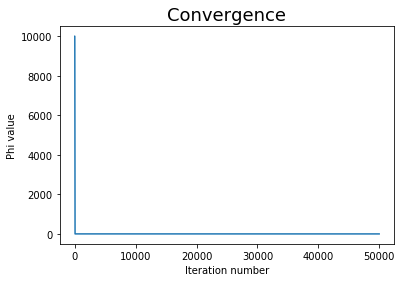

In [7]:
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(phi_list)
plt.savefig('convergence.png', dpi=300)
plt.show()

In [8]:
p0_list[-1]

array([ 1.70253427,  2.90052239])

In [9]:
phi_list.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
def steepest(p0):
    '''
    Calcula o mínimo de uma função pelo algoritmo steepest descent
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    p: array 1D - vetor de parâmetros estimados (p1, p2)
    p0_list: lista - vetores de parâmetros estimados
    phi0_list: lista - valores
    '''